**water shortage likelihood prediction**

Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings


Load and view aquastat data set

In [2]:
data = pd.read_csv('../data/aquastat_data.csv') 
data = data.pivot_table(index = "Area", columns = "Variable Name", values= "Value")
data.head()

Variable Name,% of cultivated land irrigated [harvested crop],% of total country area cultivated,"Agriculture, value added (% GDP)",Environmental Flow Requirements,GDP per capita,Gross Domestic Product (GDP),"Industry, value added to GDP",Long-term average annual precipitation in depth,Population density,SDG 6.4.2. Water Stress,"Services, value added to GDP",Total population,Total population with access to safe drinking-water (JMP),Total renewable water resources
Area,,,,,,,,,,,,,,
Afghanistan,27.509482,12.115921,23.658185,28.290,605.557362,2.150000e+10,4.500000e+09,327.0,55.595553,54.757019,1.090000e+10,36296.113,55.3,65.3300
Albania,33.772247,24.922467,19.014330,13.560,4445.132198,1.300000e+10,2.310000e+09,1485.0,104.008979,7.139423,6.590000e+09,2884.169,95.1,30.2000
Algeria,10.116196,3.561861,11.946213,4.560,4051.244377,1.670000e+11,6.080000e+10,89.0,17.377711,137.920360,8.010000e+10,41389.189,83.6,11.6670
Andorra,NaN,1.744681,0.483532,0.188,39249.689020,3.020000e+09,2.560000e+08,NaN,163.831915,NaN,2.440000e+09,77.001,100.0,0.3156
Angola,0.220901,4.183043,10.016996,110.700,4100.291004,1.220000e+11,5.090000e+10,1010.0,23.916552,1.871883,5.770000e+10,29816.766,49.0,148.4000


dataset of country location（latitude and longitude)

In [3]:
location=pd.read_csv('../data/location.csv')
location.head()

,iso2,iso3,Area,Latitude,Longitude
0,AF,AFG,Afghanistan,33.939110,67.709953
1,AO,AGO,Angola,-11.202692,17.873887
2,AL,ALB,Albania,41.153332,20.168331
3,AD,AND,Andorra,42.546245,1.601554
4,AE,ARE,United Arab Emirates,23.424076,53.847818


combine two datasets

In [4]:
loc1 = location.loc[:, [ "Area","Latitude","Longitude"]]
loc1.drop_duplicates(inplace=True)
data =loc1.merge(data, on="Area", how="left")
data

,Area,Latitude,Longitude,% of cultivated land irrigated [harvested crop],% of total country area cultivated,"Agriculture, value added (% GDP)",Environmental Flow Requirements,GDP per capita,Gross Domestic Product (GDP),"Industry, value added to GDP",Long-term average annual precipitation in depth,Population density,SDG 6.4.2. Water Stress,"Services, value added to GDP",Total population,Total population with access to safe drinking-water (JMP),Total renewable water resources
0,Afghanistan,33.939110,67.709953,27.509482,12.115921,23.658185,28.290,605.557362,2.150000e+10,4.500000e+09,327.0,55.595553,54.757019,1.090000e+10,36296.113,55.3,65.3300
1,Angola,-11.202692,17.873887,0.220901,4.183043,10.016996,110.700,4100.291004,1.220000e+11,5.090000e+10,1010.0,23.916552,1.871883,5.770000e+10,29816.766,49.0,148.4000
2,Albania,41.153332,20.168331,33.772247,24.922467,19.014330,13.560,4445.132198,1.300000e+10,2.310000e+09,1485.0,104.008979,7.139423,6.590000e+09,2884.169,95.1,30.2000
3,Andorra,42.546245,1.601554,NaN,1.744681,0.483532,0.188,39249.689020,3.020000e+09,2.560000e+08,NaN,163.831915,NaN,2.440000e+09,77.001,100.0,0.3156
4,United Arab Emirates,23.424076,53.847818,66.909308,1.179949,0.786661,NaN,40180.344050,3.780000e+11,1.480000e+11,78.0,133.584948,1708.000000,2.270000e+11,9487.203,99.6,0.1500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Samoa,-13.759029,-172.104629,NaN,10.563380,10.277409,NaN,4197.376370,8.250000e+08,1.080000e+08,2880.0,68.785915,NaN,6.320000e+08,195.352,99.0,0.0000
196,Yemen,15.552727,48.516388,37.976508,2.628369,18.861460,NaN,854.926716,2.420000e+10,4.560000e+09,167.0,52.720456,169.761905,1.470000e+10,27834.819,54.9,2.1000
197,South Africa,-30.559482,22.937506,13.413357,10.182185,2.361245,20.120,6153.459018,3.490000e+11,7.990000e+10,495.0,46.764190,62.055716,2.250000e+11,57009.756,93.2,51.3500
198,Zambia,-13.133897,27.849332,1.443952,5.096929,4.024275,49.360,1513.276090,2.590000e+10,8.660000e+09,1020.0,22.393536,2.835498,1.450000e+10,16853.599,65.4,104.8000


Calculate the new variables

In [5]:
data['% of total country area irrigated (%)']=data['% of total country area cultivated']*data['% of cultivated land irrigated [harvested crop]']/100
data['Industry, value added (% GDP)']=data['Industry, value added to GDP']/data['Gross Domestic Product (GDP)']*100
data['Services, value added (% GDP)']=data['Services, value added to GDP']/data['Gross Domestic Product (GDP)']*100
data['water resource per capita']=((data['Total renewable water resources']*1000000)-(data['Environmental Flow Requirements']*1000000))/data['Total population']

In [6]:
print(data['water resource per capita'].describe())

count       153.000000
mean       7331.632203
std       19238.740866
min          92.265940
25%        1020.494949
50%        2935.528192
75%        7003.236344
max      220070.396210
Name: water resource per capita, dtype: float64


In [7]:
data.isnull().any()

Area                                                         False
Latitude                                                     False
Longitude                                                    False
% of cultivated land irrigated [harvested crop]               True
% of total country area cultivated                            True
Agriculture, value added (% GDP)                              True
Environmental Flow Requirements                               True
GDP per capita                                                True
Gross Domestic Product (GDP)                                  True
Industry, value added to GDP                                  True
Long-term average annual precipitation in depth               True
Population density                                            True
SDG 6.4.2. Water Stress                                       True
Services, value added to GDP                                  True
Total population                                              

## Data Preprocessing and exploration


In [8]:
df = data.copy()
#Data types
datadict = pd.DataFrame(df.dtypes)
#Missing values
datadict['MissingVal'] = df.isnull().sum()
#Unique values
datadict['NUnique']=df.nunique()
#Count of variable
datadict['Count']=df.count()
#Rename 0 to datatype
datadict = datadict.rename(columns={0:'DataType'})
datadict

,DataType,MissingVal,NUnique,Count
Area,object,0,200,200
Latitude,float64,0,200,200
Longitude,float64,0,200,200
% of cultivated land irrigated [harvested crop],float64,23,176,177
% of total country area cultivated,float64,3,196,197
"Agriculture, value added (% GDP)",float64,6,194,194
Environmental Flow Requirements,float64,47,153,153
GDP per capita,float64,5,195,195
Gross Domestic Product (GDP),float64,4,185,196
"Industry, value added to GDP",float64,5,187,195


the distribution of water shortage index

<AxesSubplot:>

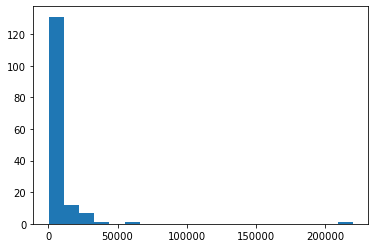

In [9]:
df['water resource per capita'].hist(grid=False, bins=20)

right skewed

dichotomization:

water shortage: water resource per capita<1700 m^3 per person per year

In [10]:
df['c']=0
df['c'][df['water resource per capita']< 1700]=1

Delete rows with missing values of water shortage index

replace NaN in the predictors with mean

In [11]:
df = df.dropna(axis=0,subset=['water resource per capita'])
df = df.fillna(df.mean())
df.shape

(153, 22)

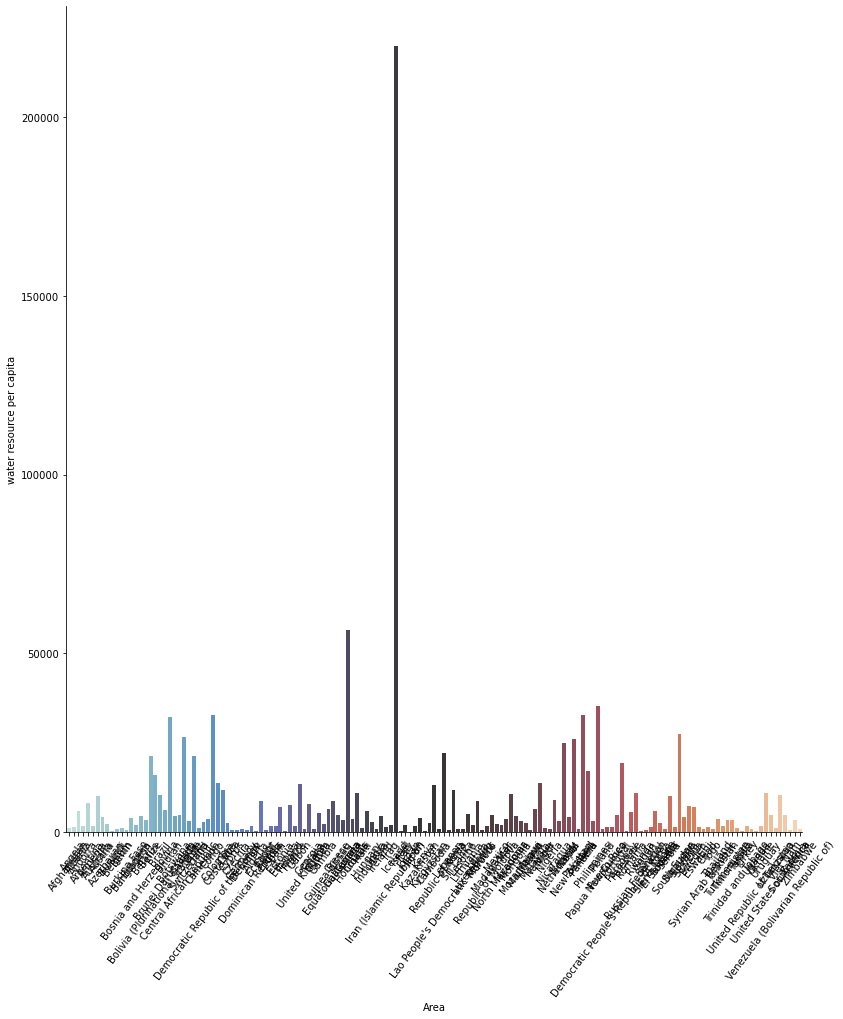

In [12]:
g = sns.catplot(
    data=df, kind="bar", x = "Area", y='water resource per capita', 
    ci="sd", palette="icefire", alpha=.9, height=12)
g.set_xticklabels(rotation=53)
g.set_axis_labels( "Area", 'water resource per capita')

In [13]:
data['water resource per capita'].describe()

count       153.000000
mean       7331.632203
std       19238.740866
min          92.265940
25%        1020.494949
50%        2935.528192
75%        7003.236344
max      220070.396210
Name: water resource per capita, dtype: float64

## Fit a logistic regression model

Variable selection procedure: backward elimination based on p-value 

In [14]:
x_columns=['Latitude',
    'Longitude',
    '% of total country area cultivated',
    '% of total country area irrigated (%)',
    'Long-term average annual precipitation in depth',
    'Population density',
    'GDP per capita',
    'Agriculture, value added (% GDP)',
    'Industry, value added (% GDP)',
    'Services, value added (% GDP)',]
x = df[x_columns]
y = df['c']
x = sm.add_constant(x)

In [15]:
model = sm.Logit(y,x)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.391070
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      c   No. Observations:                  153
Model:                          Logit   Df Residuals:                      142
Method:                           MLE   Df Model:                           10
Date:                Mon, 31 May 2021   Pseudo R-squ.:                  0.4077
Time:                        10:29:27   Log-Likelihood:                -59.834
converged:                       True   LL-Null:                       -101.03
Covariance Type:            nonrobust   LLR p-value:                 1.709e-13
===================================================================================================================
                                                      coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
const                                             -11.1856      6.055     -1.847      0.065     -23.053       0.681
Latitude                                           -0.0249      0.011     -2.268      0.023      -0.046      -0.003
Longitude                                           0.0032      0.005      0.629      0.529      -0.007       0.013
% of total country area cultivated                  0.0391      0.022      1.785      0.074      -0.004       0.082
% of total country area irrigated (%)              -0.1746      0.065     -2.707      0.007      -0.301      -0.048
Long-term average annual precipitation in depth    -0.0033      0.001     -5.295      0.000      -0.004      -0.002
Population density                                  0.0134      0.003      3.926      0.000       0.007       0.020
GDP per capita                                  -1.637e-05    1.8e-05     -0.909      0.363   -5.17e-05    1.89e-05
Agriculture, value added (% GDP)                    0.1606      0.064      2.521      0.012       0.036       0.286
Industry, value added (% GDP)                       0.1279      0.060      2.118      0.034       0.010       0.246
Services, value added (% GDP)                       0.1362      0.073      1.868      0.062      -0.007       0.279
===================================================================================================================
"""

remove longitude

In [16]:
x_columns.remove('Longitude')
x = df[x_columns]
y = df['c']
x = sm.add_constant(x)
model = sm.Logit(y,x)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.392371
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      c   No. Observations:                  153
Model:                          Logit   Df Residuals:                      143
Method:                           MLE   Df Model:                            9
Date:                Mon, 31 May 2021   Pseudo R-squ.:                  0.4058
Time:                        10:29:28   Log-Likelihood:                -60.033
converged:                       True   LL-Null:                       -101.03
Covariance Type:            nonrobust   LLR p-value:                 6.510e-14
===================================================================================================================
                                                      coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
const                                             -10.8273      5.971     -1.813      0.070     -22.530       0.875
Latitude                                           -0.0244      0.011     -2.229      0.026      -0.046      -0.003
% of total country area cultivated                  0.0372      0.022      1.719      0.086      -0.005       0.080
% of total country area irrigated (%)              -0.1626      0.061     -2.655      0.008      -0.283      -0.043
Long-term average annual precipitation in depth    -0.0033      0.001     -5.366      0.000      -0.005      -0.002
Population density                                  0.0135      0.003      3.940      0.000       0.007       0.020
GDP per capita                                  -1.547e-05   1.79e-05     -0.864      0.388   -5.06e-05    1.96e-05
Agriculture, value added (% GDP)                    0.1594      0.063      2.530      0.011       0.036       0.283
Industry, value added (% GDP)                       0.1284      0.060      2.136      0.033       0.011       0.246
Services, value added (% GDP)                       0.1314      0.072      1.833      0.067      -0.009       0.272
===================================================================================================================
"""

remove GDP per captia

In [17]:
x_columns.remove('GDP per capita')
x=df[x_columns]
y=df['c']
x = sm.add_constant(x)
model = sm.Logit(y,x)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.394936
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      c   No. Observations:                  153
Model:                          Logit   Df Residuals:                      144
Method:                           MLE   Df Model:                            8
Date:                Mon, 31 May 2021   Pseudo R-squ.:                  0.4019
Time:                        10:29:28   Log-Likelihood:                -60.425
converged:                       True   LL-Null:                       -101.03
Covariance Type:            nonrobust   LLR p-value:                 2.801e-14
===================================================================================================================
                                                      coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
const                                              -9.9414      5.833     -1.704      0.088     -21.374       1.491
Latitude                                           -0.0276      0.010     -2.683      0.007      -0.048      -0.007
% of total country area cultivated                  0.0412      0.021      1.962      0.050    3.98e-05       0.082
% of total country area irrigated (%)              -0.1530      0.060     -2.559      0.010      -0.270      -0.036
Long-term average annual precipitation in depth    -0.0034      0.001     -5.462      0.000      -0.005      -0.002
Population density                                  0.0129      0.003      3.904      0.000       0.006       0.019
Agriculture, value added (% GDP)                    0.1564      0.062      2.526      0.012       0.035       0.278
Industry, value added (% GDP)                       0.1277      0.060      2.129      0.033       0.010       0.245
Services, value added (% GDP)                       0.1138      0.068      1.676      0.094      -0.019       0.247
===================================================================================================================
"""

remove Services, value added (% GDP)

In [18]:
x_columns.remove('Services, value added (% GDP)')
x=df[x_columns]
y=df['c']
x = sm.add_constant(x)
model = sm.Logit(y,x)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.404214
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      c   No. Observations:                  153
Model:                          Logit   Df Residuals:                      145
Method:                           MLE   Df Model:                            7
Date:                Mon, 31 May 2021   Pseudo R-squ.:                  0.3878
Time:                        10:29:28   Log-Likelihood:                -61.845
converged:                       True   LL-Null:                       -101.03
Covariance Type:            nonrobust   LLR p-value:                 2.971e-14
===================================================================================================================
                                                      coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
const                                              -0.3262      1.020     -0.320      0.749      -2.325       1.673
Latitude                                           -0.0267      0.010     -2.640      0.008      -0.047      -0.007
% of total country area cultivated                  0.0291      0.020      1.490      0.136      -0.009       0.067
% of total country area irrigated (%)              -0.1496      0.059     -2.549      0.011      -0.265      -0.035
Long-term average annual precipitation in depth    -0.0032      0.001     -5.424      0.000      -0.004      -0.002
Population density                                  0.0136      0.003      3.999      0.000       0.007       0.020
Agriculture, value added (% GDP)                    0.0604      0.021      2.814      0.005       0.018       0.102
Industry, value added (% GDP)                       0.0407      0.028      1.478      0.139      -0.013       0.095
===================================================================================================================
"""

remove Industry, value added (% GDP)

In [19]:
x_columns.remove('Industry, value added (% GDP)')
x=df[x_columns]
y=df['c']
x = sm.add_constant(x)
model = sm.Logit(y,x)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.411525
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      c   No. Observations:                  153
Model:                          Logit   Df Residuals:                      146
Method:                           MLE   Df Model:                            6
Date:                Mon, 31 May 2021   Pseudo R-squ.:                  0.3768
Time:                        10:29:28   Log-Likelihood:                -62.963
converged:                       True   LL-Null:                       -101.03
Covariance Type:            nonrobust   LLR p-value:                 2.252e-14
===================================================================================================================
                                                      coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
const                                               0.9030      0.593      1.522      0.128      -0.260       2.066
Latitude                                           -0.0266      0.010     -2.675      0.007      -0.046      -0.007
% of total country area cultivated                  0.0204      0.018      1.119      0.263      -0.015       0.056
% of total country area irrigated (%)              -0.1273      0.057     -2.233      0.026      -0.239      -0.016
Long-term average annual precipitation in depth    -0.0031      0.001     -5.369      0.000      -0.004      -0.002
Population density                                  0.0131      0.003      3.857      0.000       0.006       0.020
Agriculture, value added (% GDP)                    0.0503      0.020      2.537      0.011       0.011       0.089
===================================================================================================================
"""

remove % of total country area cultivated

In [20]:
x_columns.remove('% of total country area cultivated')
x=df[x_columns]
x = sm.add_constant(x)
model = sm.Logit(y,x)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.415693
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      c   No. Observations:                  153
Model:                          Logit   Df Residuals:                      147
Method:                           MLE   Df Model:                            5
Date:                Mon, 31 May 2021   Pseudo R-squ.:                  0.3704
Time:                        10:29:28   Log-Likelihood:                -63.601
converged:                       True   LL-Null:                       -101.03
Covariance Type:            nonrobust   LLR p-value:                 1.000e-14
===================================================================================================================
                                                      coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
const                                               1.1068      0.568      1.950      0.051      -0.006       2.219
Latitude                                           -0.0238      0.009     -2.515      0.012      -0.042      -0.005
% of total country area irrigated (%)              -0.1296      0.057     -2.287      0.022      -0.241      -0.019
Long-term average annual precipitation in depth    -0.0031      0.001     -5.382      0.000      -0.004      -0.002
Population density                                  0.0145      0.003      4.389      0.000       0.008       0.021
Agriculture, value added (% GDP)                    0.0515      0.020      2.624      0.009       0.013       0.090
===================================================================================================================
"""

predicted accuracy

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y,round(result.predict(x)))

0.8235294117647058

the likelihood of a water shortage 

In [22]:
df['likelihood'] = result.predict(x)

## Divide the water shortage indicator into 4 risk levels

In [25]:
category = pd.cut(aquastat['water resource per capita'],bins=[0,500,1000,1700,220071],labels=['3','2','1','0'])
aquastat.insert(21,'c of shortage',category)

In [26]:
data = data.dropna(axis=0,subset=['water resource per capita'])
data = data.fillna(df.mean())

In [27]:
data['c of shortage'].unique()

array([1, 0, 3, 2], dtype=int64)

In [28]:
x_columns=['Latitude',
    'Longitude',
    '% of total country area cultivated',
    '% of total country area irrigated (%)',
    'Long-term average annual precipitation in depth',
    'Population density',
    'GDP per capita',
    'Agriculture, value added (% GDP)',
    'Industry, value added (% GDP)',
    'Services, value added (% GDP)']
x=data[x_columns]
y=data['c of shortage']

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import naive_bayes
from sklearn.neighbors import KNeighborsClassifier

pipe = Pipeline([('classifier', RandomForestClassifier())])
param_grid = [
    {'classifier': [RandomForestClassifier()],
    'classifier__n_estimators':[50,100],'classifier__max_features': [1, 2, 3, 4],
    'classifier__min_samples_leaf':[1,2,3]},
    {'classifier': [LogisticRegression(max_iter=1000)]},
    {'classifier': [naive_bayes.GaussianNB()]},
    {'classifier': [KNeighborsClassifier()],
     'classifier__leaf_size': [10,20,30],
     'classifier__n_neighbors': [3,5,7,10]}
    ]

X_train, X_test, y_train, y_test = train_test_split(
    x, y, random_state=42)

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Best params:
{'classifier': KNeighborsClassifier(leaf_size=10, n_neighbors=10), 'classifier__leaf_size': 10, 'classifier__n_neighbors': 10}

Best cross-validation score: 0.65
